In [50]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [51]:
SEED=21563

In [52]:
def callback(**kwargs):
    stats.append(kwargs)
    return True

In [76]:
input_size=8
fitness=mlrose.fitness.queens.Queens()
problem = mlrose.DiscreteOpt(input_size, fitness,maximize=False, max_val=input_size)
problem = mlrose.DiscreteOpt(problem.length, fitness, maximize=False,max_val=input_size,
                             crossover=mlrose.algorithms.crossovers.OnePointCrossOver(problem),
                            mutator=mlrose.algorithms.mutators.SwapMutator(problem))
#problem = mlrose.QueensGenerator().generate(seed=SEED, size=8)
ga=mlrose.GARunner(problem=problem,
                  experiment_name="ga",
                  output_directory=None,
                  seed=None,
                  iteration_list=[1000],
                  max_attempts=20,
                  population_sizes=[50,100,200]*5,
                  mutation_rates=np.arange(0.1,1,0.1))

df_run_stats, df_run_curves = ga.run()
best_fitness = df_run_stats['Fitness'].min()
#df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Mutation Rate','State']).agg({'Iteration':'min','Time':'min','FEvals':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Mutation Rate']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness  FEvals      Time
Population Size Mutation Rate                           
200             0.5                0.0  8042.2  0.582133
100             0.5                0.2  3618.6  0.262403
200             0.3                0.2  7599.8  0.548906
100             0.4                0.4  3577.0  0.257826
200             0.2                0.4  6554.4  0.471352
                0.1                0.4  6675.2  0.479317
                0.4                0.4  7600.0  0.550026
                0.9                0.4  7680.2  0.564442
50              0.6                0.6  1807.8  0.130513
                0.5                0.6  2021.8  0.145071
100             0.1                0.6  2991.2  0.214263
                0.7                0.6  3698.8  0.270346
200             0.6                0.6  5951.0  0.433467
                0.7                0.6  6192.2  0.452092
                0.8                0.6  6875.8  0.504287
50              0.3                0.8  1695.2  0.121729
                0.8                0.8  1756.2  0.127212
                0.4                0.8  1766.8  0.127074
100             0.8                0.8  2829.6  0.207125
                0.6                0.8  3314.6  0.240712
                0.9                0.8  3557.2  0.260466
50              0.9                1.0  1705.4  0.124099
                0.7                1.0  1858.8  0.134532
100             0.2                1.0  2728.2  0.196271
                0.3                1.0  3213.2  0.231073
50              0.2                1.4  1367.8  0.098190
                0.1                1.4  1501.0  0.113921

==========Input Size 8=================
[5 3 6 0 7 1 4 2] 0.0
Number of Iterations: 36
Number of Fitness Evaluations: 7238
Average Fitness Evaluations per Iteration: 201.056
Wall Clock Time: 0:00:00.572935
==========Input Size 8=================
[0 3 6 2 7 1 4 0] 1.0
Number of Iterations: 25
Number of Fitness Evaluations: 5027
Average Fitness Evaluations per Iteration: 201.080
Wall Clock Time: 0:00:00.380669
==========Input Size 8=================
[4 7 5 0 6 1 6 2] 1.0
Number of Iterations: 28
Number of Fitness Evaluations: 5630
Average Fitness Evaluations per Iteration: 201.071
Wall Clock Time: 0:00:00.422448
==========Input Size 8=================
[0 4 6 4 2 7 5 3] 1.0
Number of Iterations: 36
Number of Fitness Evaluations: 7237
Average Fitness Evaluations per Iteration: 201.028
Wall Clock Time: 0:00:00.545024
==========Input Size 8=================
[2 4 7 3 0 5 1 6] 1.0
Number of Iterations: 26
Number of Fitness Evaluations: 5227
Average Fitness Evaluations per Iteration: 201.038
Wa

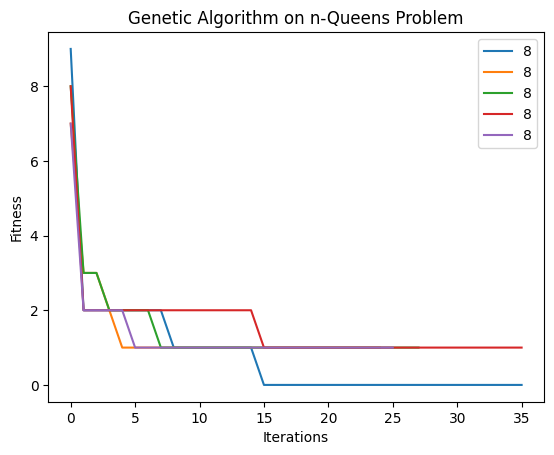

In [110]:
input_size=8
for i in range(5):
    problem = mlrose.QueensGenerator().generate(seed=None,size=input_size)  
    problem.reset()
    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.genetic_alg(problem,
                                                       random_state=None,
                                                       pop_size=200,
                                                       mutation_prob=0.5,
                                                        max_attempts=20,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time)
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")


    mimic_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Genetic Algorithm on n-Queens Problem")
plt.legend(loc='best')

In [93]:
input_size=8
fitness=mlrose.fitness.queens.Queens()
problem = mlrose.DiscreteOpt(input_size, fitness,maximize=False, max_val=input_size)
problem = mlrose.DiscreteOpt(problem.length, fitness, maximize=False,max_val=input_size,
                             crossover=mlrose.algorithms.crossovers.OnePointCrossOver(problem),
                            mutator=mlrose.algorithms.mutators.SwapMutator(problem))
#problem = mlrose.QueensGenerator().generate(seed=SEED, size=8)
mmc=mlrose.MIMICRunner(problem=problem,
                  experiment_name="mimic",
                  output_directory=None,
                  seed=None,
                  iteration_list=[1000],
                  max_attempts=20,
                  population_sizes=[200,300,500,1000]*5,
                  keep_percent_list=np.arange(0.1,1,0.1))

df_run_stats, df_run_curves = mmc.run()
best_fitness = df_run_stats['Fitness'].min()
#df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Mutation Rate','State']).agg({'Iteration':'min','Time':'min','FEvals':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Keep Percent']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness   FEvals      Time
Population Size Keep Percent                            
1000            0.2               0.0  26828.6  1.880900
                0.3               0.0  28029.4  1.960370
                0.4               0.0  28430.2  2.000851
500             0.8               0.2  15432.6  1.239027
1000            0.1               0.2  24225.2  1.682726
                0.7               0.2  31833.2  2.276173
500             0.3               0.4  12827.2  0.997838
                0.2               0.4  12927.2  1.003294
                0.4               0.4  13328.2  1.043656
                0.5               0.4  14430.4  1.134205
                0.7               0.4  15833.2  1.257998
1000            0.6               0.4  28029.2  1.987698
300             0.2               0.6   7767.2  0.682783
500             0.1               0.6  12226.0  0.945560
                0.6               0.6  14530.2  1.151937
1000            0.5               0.6  26627.8  1.889272
                0.8               0.6  27829.0  1.990246
                0.9               0.6  32834.2  2.368681
200             0.5               0.8   5428.8  0.557262
                0.8               0.8   5669.8  0.590289
300             0.1               0.8   6923.8  0.602474
                0.3               0.8   7526.0  0.660015
                0.8               0.8   8007.8  0.725013
                0.6               0.8   8730.6  0.785902
500             0.9               0.8  14530.4  1.165733
200             0.3               1.0   4865.4  0.493809
                0.9               1.0   5790.4  0.604734
                0.7               1.0   5830.4  0.604201
300             0.4               1.0   7706.6  0.684487
                0.7               1.0   8308.8  0.746927
200             0.1               1.2   4583.2  0.464639
                0.4               1.2   4945.6  0.502753
                0.6               1.2   5026.2  0.516703
300             0.5               1.2   7225.0  0.647380
                0.9               1.2   8911.0  0.813925
200             0.2               1.4   4583.6  0.462663

In [61]:
input_sizes=np.arange(5,21)
rhc_results=[]
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)

    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.random_hill_climb(problem,
                                                                   max_attempts=100,
                                                                   restarts=10,
                                                                   random_state=SEED,
                                                                   state_fitness_callback=callback,
                                                                   callback_user_info=[]
                                                                  )
    wall_clock_time=(datetime.now()-start_time)


    rhc_results.append({
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    })


In [66]:

sa_results=[]
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)

    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.simulated_annealing(problem,
                                     max_attempts=100,
                                     random_state=SEED,
                                     schedule=mlrose.GeomDecay(init_temp=10000, decay=0.999, min_temp=0.001),
                                     state_fitness_callback=callback,
                                     callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time)


    sa_results.append({
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    })


In [77]:

ga_results=[]
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)

    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.genetic_alg(problem,
                                                                 pop_size=200,
                                                                 mutation_prob=0.5,
                                                                 max_attempts=50,
                                                                 random_state=SEED,
                                                                 state_fitness_callback=callback,
                                                                 callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time)


    ga_results.append({
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    })


In [94]:
mimic_results=[]
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)

    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.mimic(problem,pop_size=1000,
                                                keep_pct=0.2,
                                                max_attempts=50,
                                                       random_state=SEED+1,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time)


    mimic_results.append({
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    })


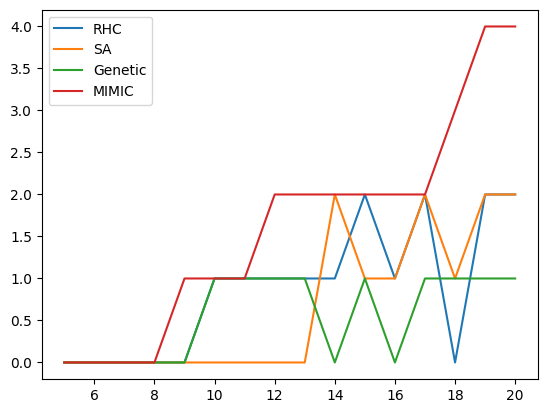

In [97]:
input_size=8
curve='best_fitness'
x=['RHC','SA','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
for alg,name in zip(y,x):
    plt.plot(input_sizes,[i[curve] for i in alg],label=name)
    
plt.legend(loc='best')

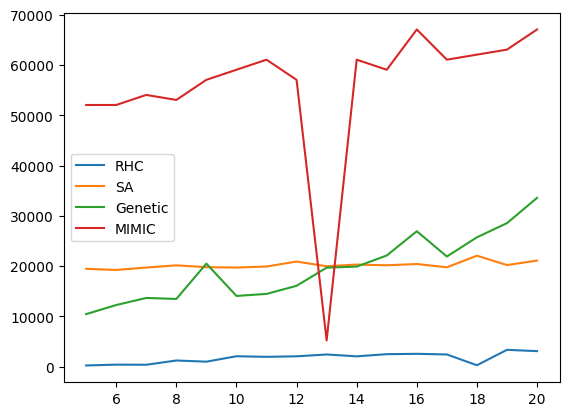

In [113]:
input_size=8
curve='n_evals'
x=['RHC','SA','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
for alg,name in zip(y,x):
    plt.plot(input_sizes,[i[curve] for i in alg],label=name)
    
plt.legend(loc='best')